## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

### Camera Calibration: Find object points and image points

Images read: 20 corners found 17 corners not found 3


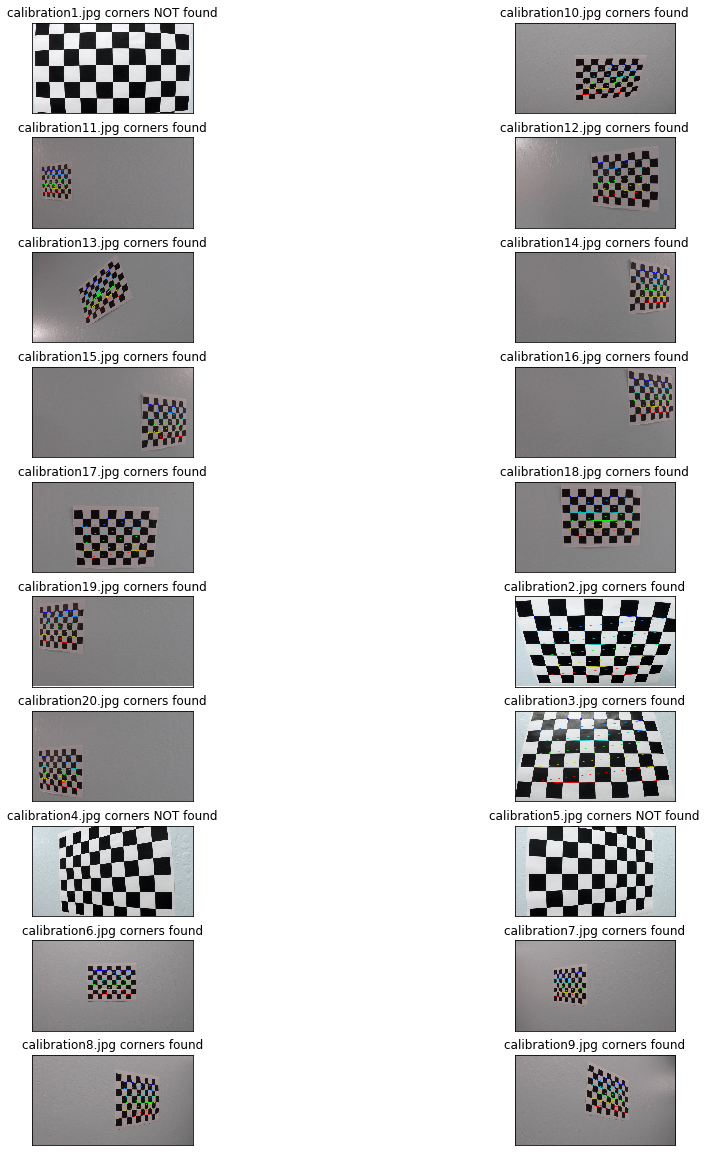

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

def find_objpoints_imgpoints(images):
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.

    # Define some display and debugging variables
    images_with_corners = []
    image_filenames = []
    images_read, corners_found, corners_not_found = 0, 0, 0

    # Step through the list and search for chessboard corners
    for fi, fname in enumerate(images):
        img = cv2.imread(fname)
        images_read += 1
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        # If found, add object points, image points
        if ret == True:
            corners_found += 1
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            img_with_corners = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            #cv2.imshow('img', img_with_corners)
            #cv2.waitKey(500)
            images_with_corners.append(img_with_corners)
            image_filenames.append(fname.split('/')[-1] + ' corners found')
        # If not found, just account for the issue and display the original image
        else:
            corners_not_found +=1
            #cv2.imshow('img', img)
            #cv2.waitKey(500)
            images_with_corners.append(img)
            image_filenames.append(fname.split('/')[-1] + ' corners NOT found')


    # Show the results of corner searching and drawing
    print('Images read:', images_read, 'corners found', corners_found, 'corners not found', corners_not_found)
    ax = np.ndarray(20)
    fig, (ax) = plt.subplots(nrows=10, ncols=2, figsize=(16,16))
    fig.tight_layout()
    for i in range(len(images)):
            # Display the image with drawn corners
            # Display the original image if corners are not successfully found
            plt.subplot(10, 2, i + 1)
            plt.xticks([]), plt.yticks([])
            plt.title(image_filenames[i])
            plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
            plt.imshow(images_with_corners[i])

    return objpoints, imgpoints, gray.shape[::-1]

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Get object points, image points and image shape
objpoints, imgpoints, imgshape = find_objpoints_imgpoints(images)

#cv2.destroyAllWindows()

## Camera Calibration: compute matrix and distortion coefficients

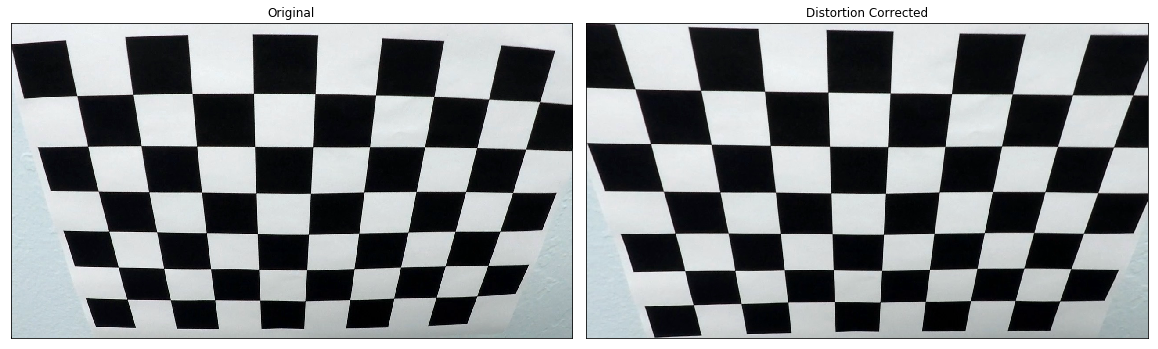

In [2]:
# Calibrate the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imgshape, None, None)

# Read and undistort a calibration image

cal_img = cv2.imread('./camera_cal/calibration2.jpg')

# Show the original calibration image
ax = np.ndarray(2)
fig, (ax) = plt.subplots(nrows=1, ncols=2, figsize=(16,16))
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.imshow(cal_img)

# Undistort the calibration image
corrected_img = cv2.undistort(cal_img, mtx, dist, None, mtx)

# Show the undistorted calibration image
plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.title('Distortion Corrected')
plt.tight_layout(pad=0.4, w_pad=0.75, h_pad=1.0)
plt.imshow(corrected_img)

### Distortion-Corrected Image

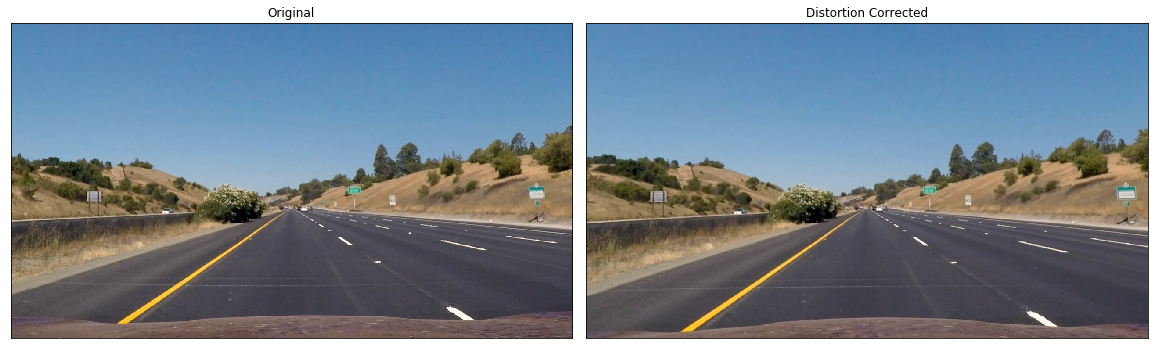

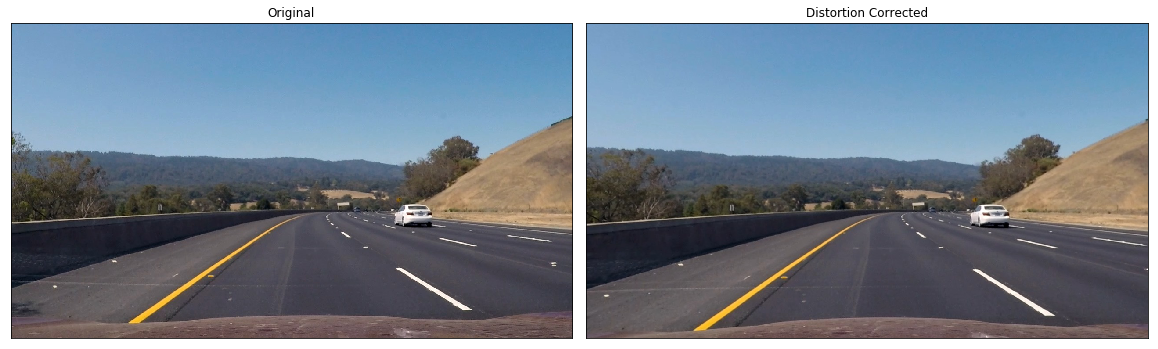

In [3]:
# Read and undistort a test image

test_img1 = cv2.imread('./test_images/straight_lines1.jpg')
test_img1 = cv2.cvtColor(test_img1, cv2.COLOR_BGR2RGB)

# Show the original test image
ax = np.ndarray(2)
fig, (ax) = plt.subplots(nrows=1, ncols=2, figsize=(16,16))
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.imshow(test_img1)

# Undistort the test image
corrected_test_img1 = cv2.undistort(test_img1, mtx, dist, None, mtx)

# Show the undistorted test image
plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.title('Distortion Corrected')
plt.tight_layout(pad=0.4, w_pad=0.75, h_pad=1.0)
plt.imshow(corrected_test_img1)

test_img2 = cv2.imread('./test_images/test3.jpg')
test_img2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2RGB)

# Show the original test image
ax = np.ndarray(2)
fig, (ax) = plt.subplots(nrows=1, ncols=2, figsize=(16,16))
fig.tight_layout()
plt.subplot(1, 2, 1)
plt.xticks([]), plt.yticks([])
plt.title('Original')
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
plt.imshow(test_img2)

# Undistort the test image
corrected_test_img2 = cv2.undistort(test_img2, mtx, dist, None, mtx)

# Show the undistorted test image
plt.subplot(1, 2, 2)
plt.xticks([]), plt.yticks([])
plt.title('Distortion Corrected')
plt.tight_layout(pad=0.4, w_pad=0.75, h_pad=1.0)
plt.imshow(corrected_test_img2)

### Thresholded Binary Image

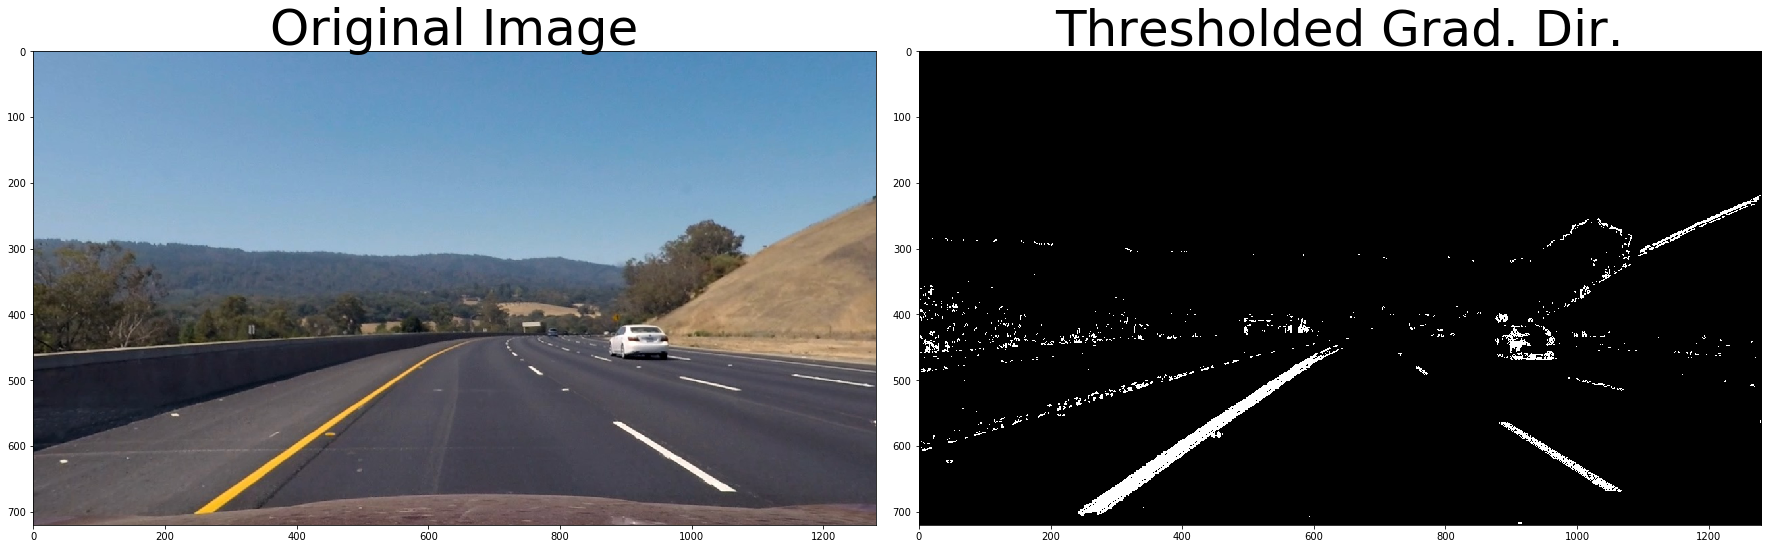

In [4]:
def thresholded_binary(img):
    # Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:, :, 2]
    # Apply a threshold to the S channel
    s_binary = np.zeros_like(S)
    s_binary[(S > 170) & (S <= 255)] = 1

    # Apply Sobel x
    # Take the derivative in x
    # Take the absolute value of the derivative or gradient
    sobelx = cv2.Sobel(S, cv2.CV_64F, 1, 0, ksize=3)
    abs_sobelx = np.absolute(sobelx)
    # Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
    # Apply threshold
    sx_binary = np.zeros_like(scaled_sobel)
    sx_binary[(scaled_sobel >= 20) & (scaled_sobel <= 100)] = 1

    # Calculate gradient magnitude
    sobelx = cv2.Sobel(S, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(S, cv2.CV_64F, 0, 1, ksize=3)
    # Calculate the magnitude
    mag_sobelxy = np.sqrt(sobelx**2 + sobely**2)
    # Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobelxy = np.uint8(255 * mag_sobelxy / np.max(mag_sobelxy))
    # Apply threshold
    mag_binary = np.zeros_like(scaled_sobelxy)
    mag_binary[(scaled_sobelxy >= 20) & (scaled_sobelxy <= 100)] = 1

    # Calculate gradient direction
    sobelx = cv2.Sobel(S, cv2.CV_64F, 1, 0, ksize=15)
    sobely = cv2.Sobel(S, cv2.CV_64F, 0, 1, ksize=15)
    # Take the absolute value of the y gradient
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of
    # the gradient
    arctan = np.arctan2(abs_sobely, abs_sobelx)
    # Apply threshold
    dir_binary = np.zeros_like(arctan)
    dir_binary[(arctan >= 0.7) & (arctan <= 1.3)] = 1

    combined = np.zeros_like(dir_binary)
    combined[(s_binary == 1) | ( (sx_binary == 1) | ((mag_binary == 1) & (dir_binary == 1)) )] = 1

    return combined

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(corrected_test_img2)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(thresholded_binary(corrected_test_img2), cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### Perspective Transform: Select Source Points and Destination Points

In [5]:
img_size = (test_img1.shape[1], test_img1.shape[0])

src = np.float32(
    [[(img_size[0] / 2) - 62, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 68), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

print('Source points')
print(src)
print('Destination points')
print(dst)

Source points
[[  578.           460.        ]
 [  203.33332825   720.        ]
 [ 1126.66662598   720.        ]
 [  708.           460.        ]]
Destination points
[[ 320.    0.]
 [ 320.  720.]
 [ 960.  720.]
 [ 960.    0.]]


### Region of Interest

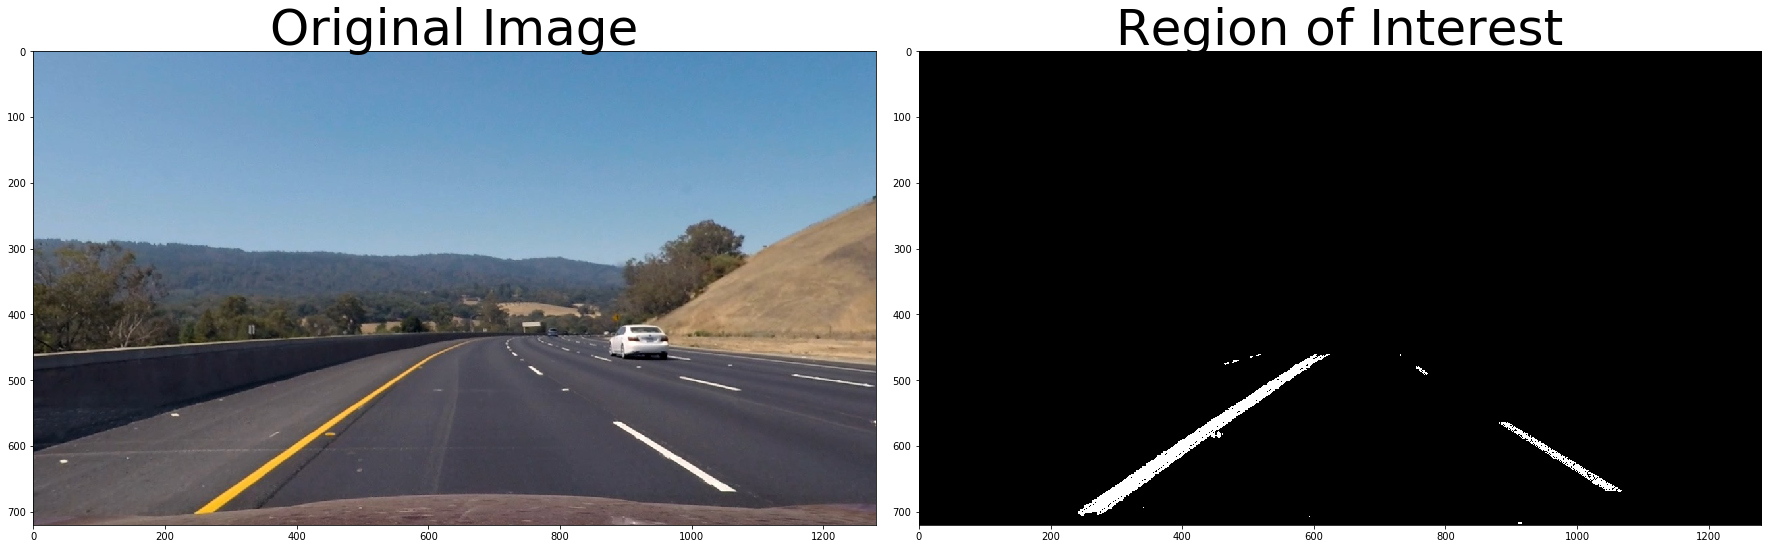

In [6]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

region = [np.int32(
    [[(img_size[0] / 2) - 62 - 100, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10 - 100), img_size[1]],
    [(img_size[0] * 5 / 6) + 60 + 100, img_size[1]],
    [(img_size[0] / 2 + 68 + 100), img_size[1] / 2 + 100]])]

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(corrected_test_img2)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(region_of_interest(thresholded_binary(corrected_test_img2), region), cmap='gray')
ax2.set_title('Region of Interest', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Perspective Transform

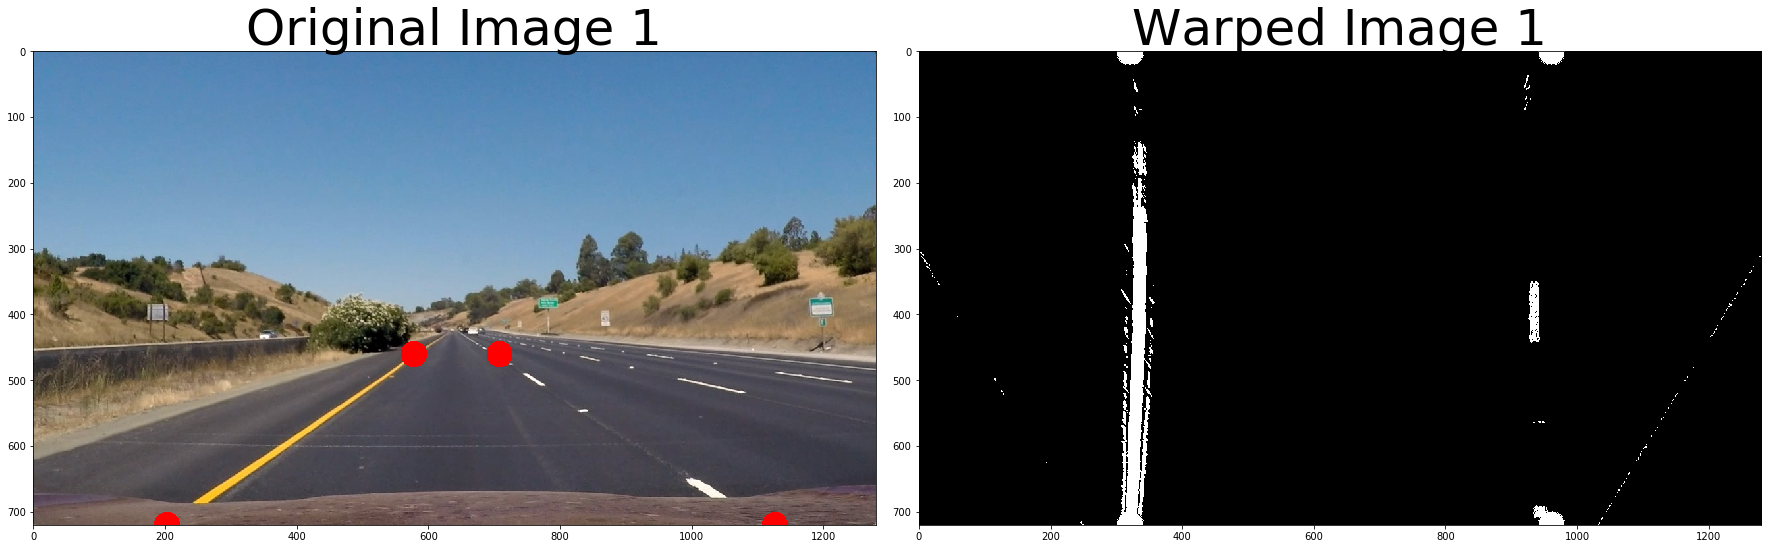

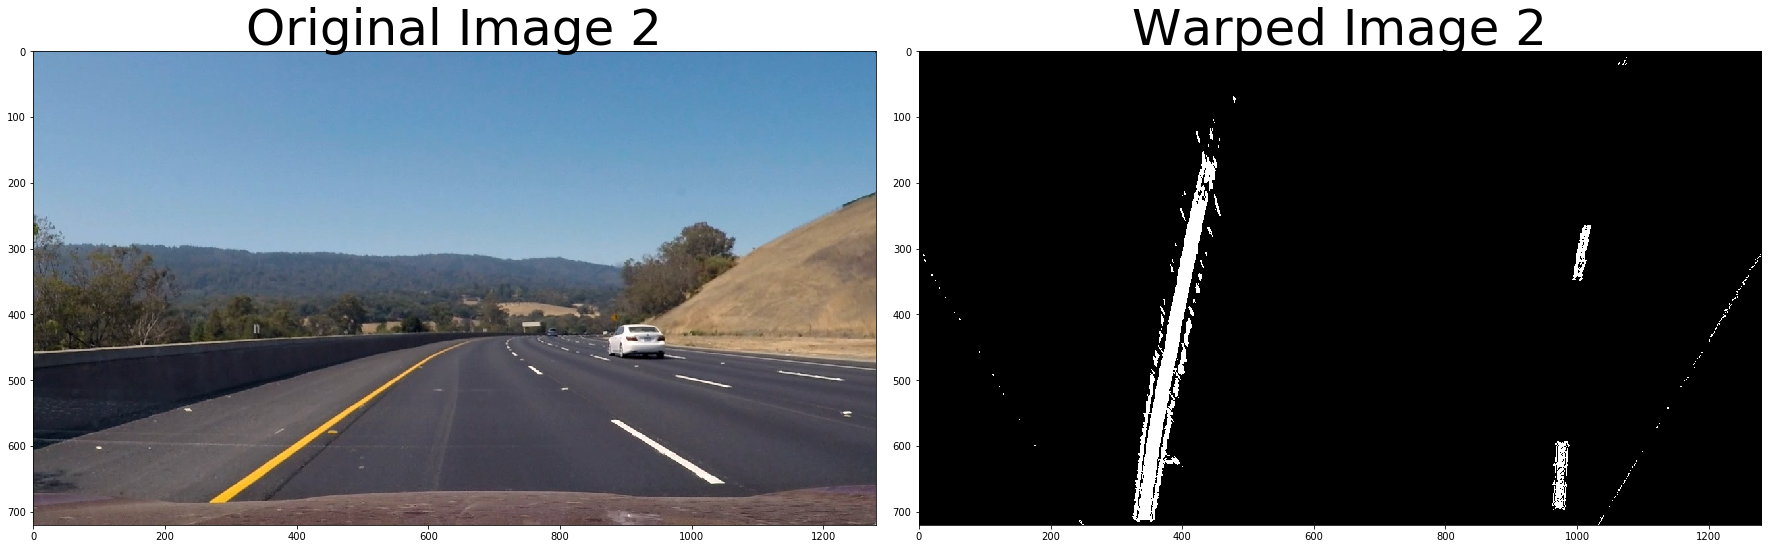

In [7]:
def get_transforms(src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    return M, Minv

def warper (img, M):
    img_warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return img_warped

# Image 1

M, Minv = get_transforms(src, dst)
masked_img1 = region_of_interest(corrected_test_img1, region)
warped_image1 = warper(masked_img1, M)

img_with_points = test_img1

thickness = -1;
lineType = 8;

cv2.circle(img_with_points, (int(src[0,0]), int(src[0,1])), 20, ( 255, 0, 0 ), thickness, lineType);
cv2.circle(img_with_points, (int(src[1,0]), int(src[1,1])), 20, ( 255, 0, 0 ), thickness, lineType);
cv2.circle(img_with_points, (int(src[2,0]), int(src[2,1])), 20, ( 255, 0, 0 ), thickness, lineType);
cv2.circle(img_with_points, (int(src[3,0]), int(src[3,1])), 20, ( 255, 0, 0 ), thickness, lineType);

cv2.circle(warped_image1, (int(dst[0,0]), int(dst[0,1])), 20, ( 255, 0, 0 ), thickness, lineType);
cv2.circle(warped_image1, (int(dst[1,0]), int(dst[1,1])), 20, ( 255, 0, 0 ), thickness, lineType);
cv2.circle(warped_image1, (int(dst[2,0]), int(dst[2,1])), 20, ( 255, 0, 0 ), thickness, lineType);
cv2.circle(warped_image1, (int(dst[3,0]), int(dst[3,1])), 20, ( 255, 0, 0 ), thickness, lineType);

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img1)
ax1.set_title('Original Image 1', fontsize=50)
ax2.imshow(thresholded_binary(warped_image1), cmap='gray')
ax2.set_title('Warped Image 1', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Image 2

masked_img2 = region_of_interest(corrected_test_img2, region)
warped_image2 = warper(masked_img2, M)


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img2)
ax1.set_title('Original Image 2', fontsize=50)
ax2.imshow(thresholded_binary(warped_image2), cmap='gray')
ax2.set_title('Warped Image 2', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### Identifying Lane Lines: Basic Histogram of Warped Image

(720, 1280) 360


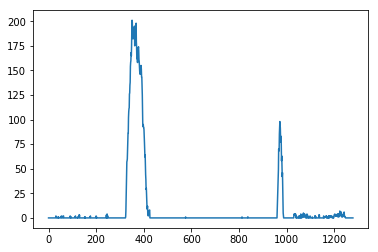

In [8]:
hist_image = thresholded_binary(warped_image2)
print(hist_image.shape, hist_image.shape[0]//2)
histogram = np.sum(hist_image[hist_image.shape[0]//2:,:], axis=0)
plt.plot(histogram)


In [14]:
import collections

# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = collections.deque([], 16)  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 


### Identifying Lane Lines: Find Lane Pixels with Sliding Windows

Radius of curvature - real space center m 1627.09436975 left m 2611.71117079 right m 642.477568717
Image width (px) 1280 Lane width (px) 638.192716289
Image width (m) 6.765714285714286 Lane width (m) 3.37330435753


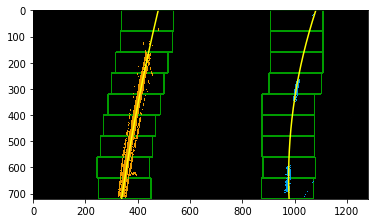

In [15]:
def find_lane_lines(binary_warped, left_line, right_line, testing=False):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image

    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        if (testing):
            # Draw the windows on the visualization image
            cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,100,0), 4) 
            cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,100,0), 4) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Radius of curvature
    y_eval = np.max(ploty)
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    center_curverad = np.mean( np.array([left_curverad, right_curverad]), axis=0 )
    # Now our radius of curvature is in meters
    # Example values: 632.1 m    626.2 m

    right_turn = left_curverad >= right_curverad
    if (right_turn):
        lane_width = abs(np.amin(right_fitx) - np.amin(left_fitx))
    else:
        lane_width = abs(np.amax(right_fitx) - np.amax(left_fitx))

    left_line.current_fit.appendleft(left_fit)
    right_line.current_fit.appendleft(right_fit)
    left_line.best_fit = np.mean( np.array([ i for i in left_line.current_fit]), axis=0 )
    right_line.best_fit = np.mean( np.array([ i for i in right_line.current_fit]), axis=0 )
    left_line.radius_of_curvature = left_curverad
    right_line.radius_of_curvature = right_curverad
    left_line.detected, right_line.detected = True, True

    if (testing):
        print('Radius of curvature - real space', 'center m', center_curverad, 'left m', left_curverad, 'right m', right_curverad)
        print('Image width (px)', binary_warped.shape[1], 'Lane width (px)', lane_width)
        print('Image width (m)', binary_warped.shape[1] * xm_per_pix, 'Lane width (m)', lane_width * xm_per_pix)
    
        # Visualization
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [20,100,0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0,100,20]
        plt.imshow(out_img, cmap='gray')
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)

left_line_test = Line()
right_line_test = Line()

binary_warped = thresholded_binary(warped_image2)
find_lane_lines(binary_warped, left_line_test, right_line_test, testing=True)

### Identifying Lane Lines: Find Lane Pixels Using Previous Pixel Positions

Radius of curvature - real space center m 1803.81901984 left m 2969.48170949 right m 638.156330192
Image width (px) 1280 Lane width (px) 639.61362269
Image width (m) 6.765714285714286 Lane width (m) 3.38081486279


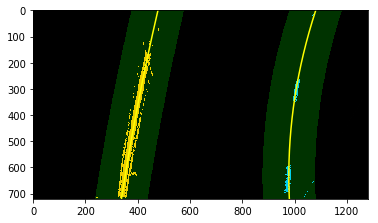

In [16]:
def extend_lane_lines(binary_warped, left_line, right_line, testing=False):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    left_fit = left_line.best_fit
    right_fit = right_line.best_fit

    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Radius of curvature
    y_eval = np.max(ploty)
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    center_curverad = np.mean( np.array([left_curverad, right_curverad]), axis=0 )
    # Now our radius of curvature is in meters
    # Example values: 632.1 m    626.2 m

    right_turn = left_curverad >= right_curverad
    if (right_turn):
        lane_width = abs(np.amin(right_fitx) - np.amin(left_fitx))
    else:
        lane_width = abs(np.amax(right_fitx) - np.amax(left_fitx))
    if (lane_width > (700 - margin) and lane_width < (700 + margin)):
        left_line.detected, right_line.detected = True, True
    else:
        left_line.detected, right_line.detected = False, False
    if (not (left_line.detected and right_line.detected)):
        return

    #print('Extending...')

    left_line.current_fit.appendleft(left_fit)
    right_line.current_fit.appendleft(right_fit)
    left_line.best_fit = np.mean( np.array([ i for i in left_line.current_fit]), axis=0 )
    right_line.best_fit = np.mean( np.array([ i for i in right_line.current_fit]), axis=0 )
    left_line.radius_of_curvature = left_curverad
    right_line.radius_of_curvature = right_curverad

    if (testing):
        print('Radius of curvature - real space', 'center m', center_curverad, 'left m', left_curverad, 'right m', right_curverad)
        print('Image width (px)', binary_warped.shape[1], 'Lane width (px)', lane_width)
        print('Image width (m)', binary_warped.shape[1] * xm_per_pix, 'Lane width (m)', lane_width * xm_per_pix)

        # Create an image to draw on and an image to show the selection window
        out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
        window_img = np.zeros_like(out_img)
        # Color in left and right line pixels
        out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [20,100,0]
        out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0,100,20]

        # Generate a polygon to illustrate the search window area
        # And recast the x and y points into usable format for cv2.fillPoly()
        left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
        left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
        left_line_pts = np.hstack((left_line_window1, left_line_window2))
        right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
        right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
        right_line_pts = np.hstack((right_line_window1, right_line_window2))

        # Draw the lane onto the warped blank image
        cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
        cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
        result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
        plt.imshow(result)
        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)

binary_warped = thresholded_binary(warped_image2)
extend_lane_lines(binary_warped, left_line_test, right_line_test, testing=True)

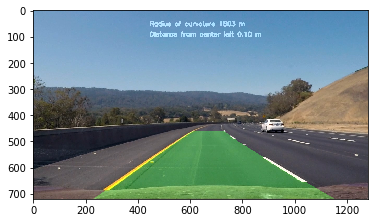

In [17]:
def draw_lane(img, left_line, right_line, Minv):
    left_fit = left_line.best_fit
    right_fit = right_line.best_fit

    # Create an image to draw the lines on
    color_warp = np.zeros_like(img).astype(np.uint8)

    # Generate x and y values for plotting
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, (np.int32(pts)), (0, 255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (color_warp.shape[1], color_warp.shape[0]))

    # Calculate radius of curvature of center of the lane
    radius_of_curvature = np.mean( np.array([left_line.radius_of_curvature, right_line.radius_of_curvature]), axis=0 )

    # Calculate offset from center of the lane
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    camera_center = (left_fitx[-1] + right_fitx[-1]) / 2
    center_diff = (camera_center - color_warp.shape[1]/2) * xm_per_pix
    if (center_diff > 0):
        side_pos = 'left '
    elif (center_diff < 0):
        side_pos = 'right '
    else:
        side_pos = ''

    radius_text = 'Radius of curvature ' + radius_of_curvature.astype(int).astype(str) + ' m'
    cv2.rectangle(newwarp,(int(img.shape[1]/3),10),(int(img.shape[1]*0.66),120),(0,0,0), -1)
    cv2.putText(img=newwarp, text=radius_text, org=(int(img.shape[1]/3+20),60), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8, color=(255,255,255), thickness=4)
    offset_text = 'Distance from center ' + side_pos + "{0:.2f}".format(center_diff) + ' m'
    cv2.putText(img=newwarp, text=offset_text, org=(int(img.shape[1]/3+20),100), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8, color=(255,255,255), thickness=4)

    # Combine the result with the original image
    result = cv2.addWeighted(img, 1, newwarp, 0.3, 0)

    return result

result = draw_lane(test_img2, left_line_test, right_line_test, Minv)
plt.imshow(result)

In [18]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

def adv_lane_finding_pipeline(img):
    # Undistort the image
    img_undistorted = cv2.undistort(img, mtx, dist, None, mtx)

    # Apply color thresholds
    img_thresh_binary = thresholded_binary(img_undistorted)

    # Transform perspective
    M, Minv = get_transforms(src, dst)
    masked_img = region_of_interest(img_thresh_binary, region)
    img_binary_warped = warper(masked_img, M)

    if (left_line.detected and right_line.detected):
        extend_lane_lines(img_binary_warped, left_line, right_line)
    else:
        find_lane_lines(img_binary_warped, left_line, right_line)
    #find_lane_lines(img_binary_warped, left_line, right_line)
    #extend_lane_lines(img_binary_warped, left_line, right_line)

    vis_img = draw_lane(img_undistorted, left_line, right_line, Minv)
    return vis_img

left_line = Line()
right_line = Line()

project_video_output = './project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("./project_video.mp4").subclip(20,60)
##clip1 = VideoFileClip("./project_video.mp4").subclip(0,5)
clip1 = VideoFileClip("./project_video.mp4")
left_line.detected, right_line.detected = False, False
white_clip = clip1.fl_image(adv_lane_finding_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video ./project_video_output.mp4
[MoviePy] Writing video ./project_video_output.mp4


100%|█████████▉| 1260/1261 [08:59<00:00,  1.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_output.mp4 

CPU times: user 8min 17s, sys: 1min 58s, total: 10min 16s
Wall time: 9min 1s
